## 주제 : 심부전증 분류 예측
- 각 파일의 컬럼은 아래와 같습니다.
age: 환자의 나이
anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
creatinine_phosphokinase: 크레아틴키나제 검사 결과 (크레아틴 인산분해효소) https://donbada.tistory.com/344
diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)\
ejection_fraction: 박출계수 (%) http://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=30314 \
high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
platelets: 혈소판 수 (kiloplatelets/mL) \
serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
serum_sodium: 혈중 나트륨 레벨 (mEq/L) \
sex: 성별 (0: 여성, 1: 남성) \ 
smoking: 흡연 여부 (0: 비흡연, 1: 흡연) \
time: 관찰 기간 (일) \
DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

## Step 1.데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

##Step 2. EDA 및 데이터 기초 통계 분석

데이터프레임의 각 컬럼 분석하기

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# 데이터 각 특징값(컬럼,필드)의 타입확인
# 13개의 수치형 컬럼으로 구성되어 있음. 별도의 행변환은 필요하지 않음.
# 1(빈혈), 3(당뇨), 5(혈압), 9(성별), 10(흡연여부), 12(사망여부)는 범주형 데이터 셋임
# 12(사망여부)는 y레이블값으로 처리해야하며, 0과 1로 구성되어 있어서 별도의 변환은 필요없음

# 그외 1,3,5,9,10번 필드는 더미변수로도 변환하여 작업할 수 있음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# 기술통계를 통해서 데이터의 분포도 확인
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
## 미션에 없음
# 예를 들어서 고객의 나이가 대부분 90 이하라면 이 데이터셋은 제거 하고 작업해도 됨.
df[df['age']>90]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [9]:
#[미션]
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

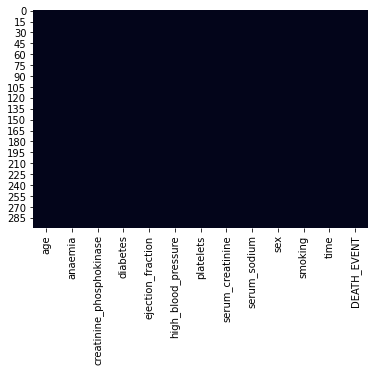

In [13]:
#[미션] 시각화
# 구글검색 '파이썬 na값 시각화'
sns.heatmap(df.isnull(),cbar=False)

In [25]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


###문제 5. 수치형 데이터의 히스토그램 그리기

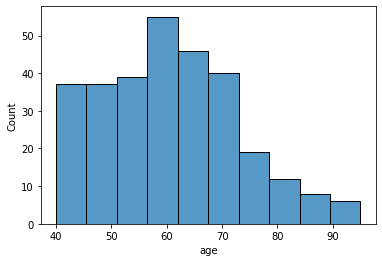

In [10]:
# df.describe()에서 확인한 것
sns.histplot(x='age',data=df)

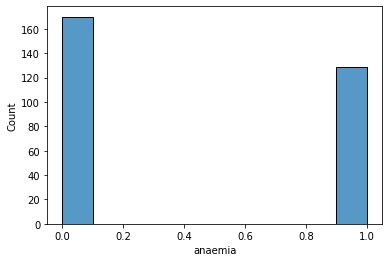

In [11]:
sns.histplot(x='anaemia',data=df)

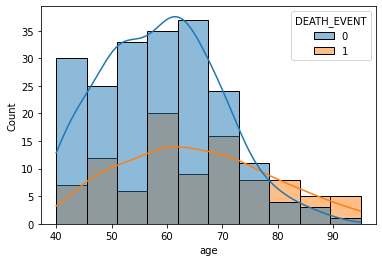

In [14]:
# 이자료에 대하여 해석하여야함 해석할때 도움되는 자료는 groupby명령어로 수치값으로 표현해서 작업해보면 더 이해가 빠름
sns.histplot(x='age',data=df,hue='DEATH_EVENT',kde=True)

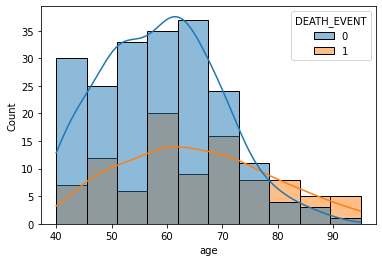

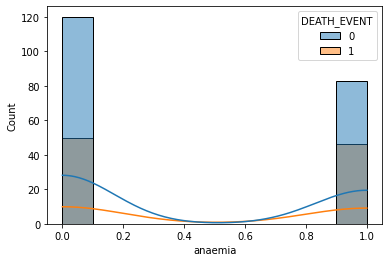

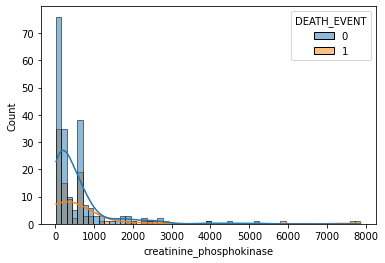

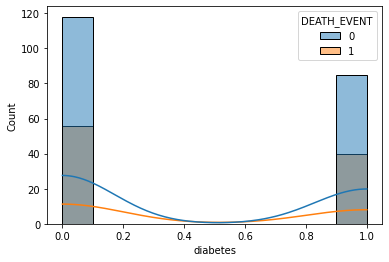

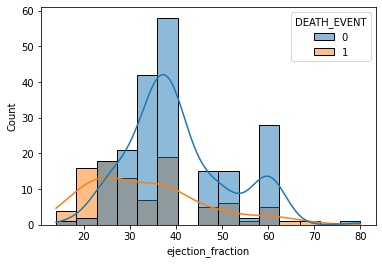

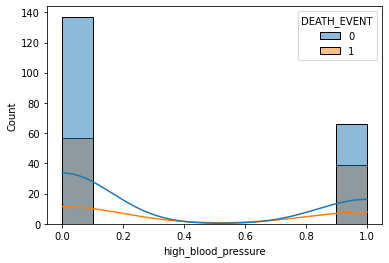

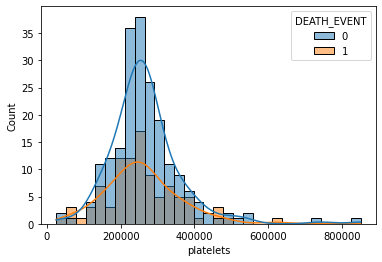

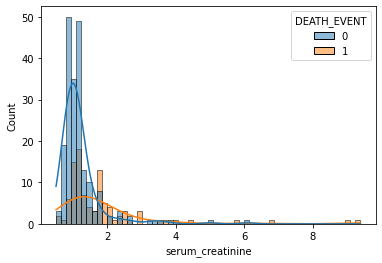

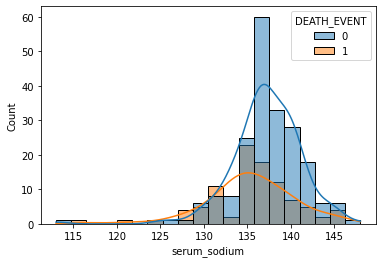

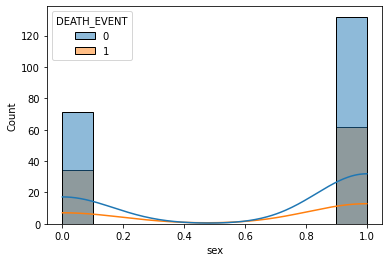

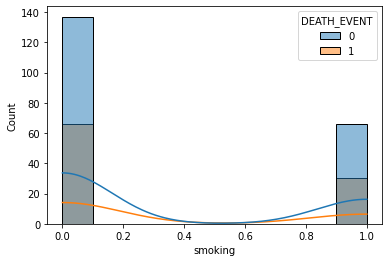

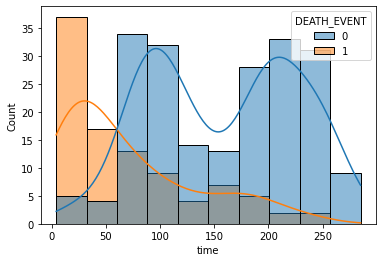

In [61]:
ind = df.columns
ind = np.delete(ind,-1)
for i in ind:
  sns.histplot(data=df,x=i,hue='DEATH_EVENT',kde=True)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


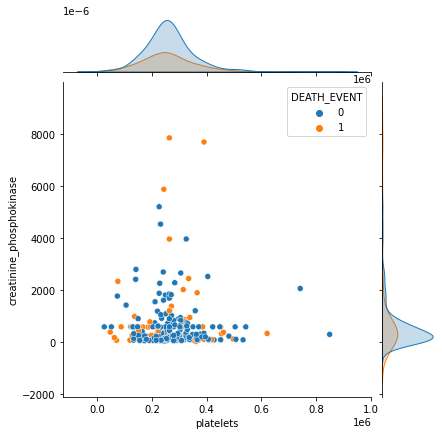

In [60]:
sns.jointplot(df['platelets'],df['creatinine_phosphokinase'],data=df,hue='DEATH_EVENT')
plt.show()

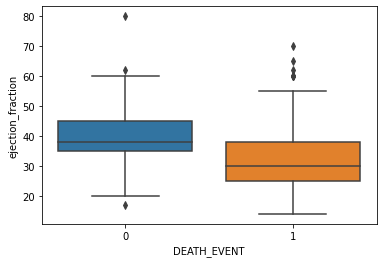

In [59]:
## 문제 6
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=df)

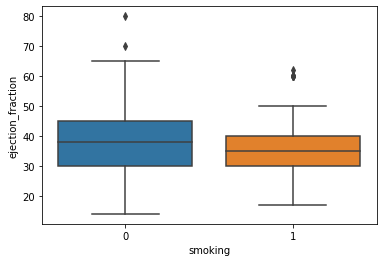

In [58]:
sns.boxplot(x='smoking',y='ejection_fraction',data=df)
plt.show()

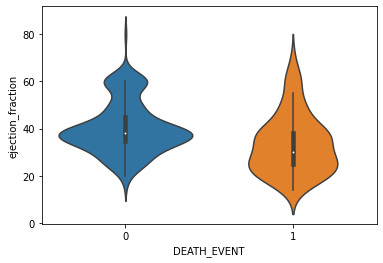

In [56]:
sns.violinplot(x='DEATH_EVENT',y='ejection_fraction',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


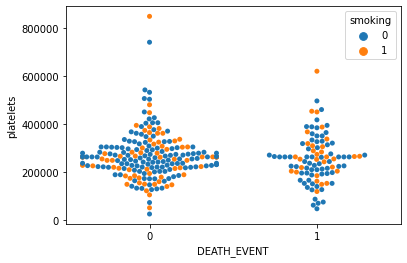

In [57]:
sns.swarmplot(x='DEATH_EVENT',y='platelets',hue='smoking',data=df)
plt.show()

In [ ]:
# a = sns.pairplot(df,hue='DEATH_EVENT')

## Step 3. 모델 학습을 위한 데이터 전처리

StandardScaler를 이용하여 데이터 전처리하기

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# 값의 범위가 평균 0, 분산 1 이 될 수 있도록 값을 일정한 범위로 조정
# x값의 값이 크면 y값에 영향을 많이 줌으로 그러한 일이 없게 값의 단위를 같게 조정함

X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']] # 범주형 데이터셋
y = df['DEATH_EVENT'] # y레이블

In [21]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scale=scaler.transform(X_num)

# transform은 사이킷런에서 제공하는 여러가지의 데이터변환기를 의미 (ex. 원핫인코딩, 데이터 표준화 등등)
# 이때 fit을 미리 해야 전처리가 가능하게 코드가 되어 있습니다.

# 스케일링된 데이터셋을 데이터프레임으로 만들고 범주형자료만 별도로 띄어낸 x_cat과 합처서 한개의 데이터 프레임을 제작
X_scale1=pd.DataFrame(data=X_scale,index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scale1,X_cat],axis=1)
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


### 학습데이터와 테스트데이터 분리하기

In [22]:
from sklearn.model_selection import train_test_split
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##Step 4. Classification 모델 학습하기

 Logistic Regression 모델 생성/학습하기

In [23]:
# LogisticRegression 모델 생성/학습
# y결과값이 0과 1의 두가지값을 갖는 이항분류

In [24]:
np.unique(y)

array([0, 1])

In [33]:
from sklearn.linear_model import LogisticRegression
#model_lr = LogisticRegression(max_iter=100)     # max_iter=100 은 오차를 최소화하기 위한 반복횟수임.
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# 1값이 예측이 잘 안되었음. 1값중에 예측이 안 맞는 것을 꺼내서 확인
pred=model_lr.predict(X_test)
cnt=0 ; tmpList=[]
for i,j in zip(y_test,pred):
  if i == j:
    tmpList.append({'y':i,'pred':j, 're':"0"})
  else:
    tmpList.append({'y':i,'pred':j, 're':"X"})
tmp=pd.DataFrame(tmpList)
tmp2=tmp[(tmp['y']==1)&(tmp['re']=='X')]
tmp2

,y,pred,re
2,1,0,X
8,1,0,X
12,1,0,X
14,1,0,X
21,1,0,X
45,1,0,X
48,1,0,X
49,1,0,X
64,1,0,X
65,1,0,X


### 모델 학습 결과 평가하기

In [34]:
from sklearn.metrics import classification_report
pred=model_lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



In [35]:
from xgboost import XGBClassifier

In [65]:
# XGBClassifier 모델 생성/학습
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Step5 모델 학습 결과 심화 분석하기
- https://m.blog.naver.com/sw4r/221681933731

In [37]:
from sklearn.metrics import plot_precision_recall_curve

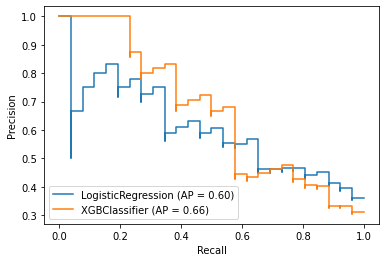

In [66]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

# 실제값이 1인데 예측이 1
# 실제값이 1인데 예측이 0
# 실제값이 0인데 예측이 1
# 실제값이 0인데 예측이 0

# 정밀도 (Precision) 실제값이 1인데 예측이 1 / (실제값이 1인데 예측이 1 + 실제값이 1인데 예측이 0)
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

## ROC 커브곡선 https://losskatsu.github.io/machine-learning/stat-roc-curve/

In [62]:
from sklearn.metrics import plot_roc_curve

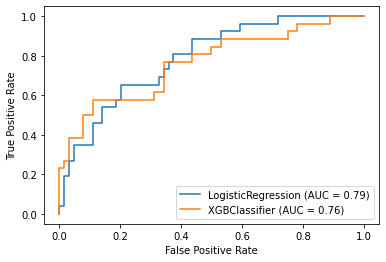

In [67]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
# AUC 넓이가 넓을수록 (값이 클수록) 성능이 좋음
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)